# Final proyect : Recommender System Part 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

%matplotlib inline

## Clustering based Course Recommender System

In [2]:
profile_genre_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/user_profile.csv"
profile_df = pd.read_csv(profile_genre_url)

In [3]:
profile_df.head()

,user,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,2,52.0,14.0,6.0,43.0,3.0,33.0,0.0,29.0,41.0,2.0,18.0,34.0,9.0,6.0
1,4,40.0,2.0,4.0,28.0,0.0,14.0,0.0,20.0,24.0,0.0,6.0,6.0,0.0,2.0
2,5,24.0,8.0,18.0,24.0,0.0,30.0,0.0,22.0,14.0,2.0,14.0,26.0,4.0,6.0
3,7,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
4,8,6.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,0.0,2.0,0.0,0.0,0.0


In [4]:
profile_df.shape

(33901, 15)

In [5]:
feature_names = list(profile_df.columns[1:])
feature_names

['Database',
 'Python',
 'CloudComputing',
 'DataAnalysis',
 'Containers',
 'MachineLearning',
 'ComputerVision',
 'DataScience',
 'BigData',
 'Chatbot',
 'R',
 'BackendDev',
 'FrontendDev',
 'Blockchain']

In [6]:
profile_df.describe()

,user,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
count,3.390100e+04,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000
mean,1.064064e+06,5.518569,3.493791,2.307100,3.624701,0.998938,3.048022,0.001770,5.087343,4.750450,0.462995,1.017433,2.269461,0.315802,0.986844
std,4.972578e+05,7.611941,4.227254,3.841858,4.760135,2.351764,4.624004,0.072846,5.230697,7.216228,1.055186,2.342532,4.310752,1.363462,1.950585
min,2.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.813480e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.043907e+06,3.000000,3.000000,0.000000,3.000000,0.000000,0.000000,0.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.451159e+06,9.000000,6.000000,3.000000,6.000000,0.000000,3.000000,0.000000,9.000000,6.000000,0.000000,0.000000,3.000000,0.000000,2.000000
max,2.103039e+06,63.000000,18.000000,38.000000,48.000000,15.000000,39.000000,3.000000,32.000000,54.000000,6.000000,18.000000,54.000000,15.000000,12.000000


The original user profile feature vector is not normalized, which may cause issues when we perform clustering and Principal component analysis (PCA), therefor we standardize the data.


In [7]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

In [8]:
# Use StandardScaler to make each feature with mean 0, standard deviation 1
# Instantiating a StandardScaler object
scaler = StandardScaler()

# Standardizing the selected features (feature_names) in the user_profile_df DataFrame
profile_df[feature_names] = scaler.fit_transform(profile_df[feature_names])

# Printing the mean and standard deviation of the standardized features
print("mean {} and standard deviation{} ".format(profile_df[feature_names].mean(), profile_df[feature_names].std()))

mean Database          -3.353495e-17
Python            -5.700942e-17
CloudComputing    -3.521170e-17
DataAnalysis      -7.671120e-17
Containers         3.353495e-18
MachineLearning    3.688845e-17
ComputerVision    -1.509073e-17
DataScience       -1.676748e-17
BigData            6.706990e-17
Chatbot           -6.874665e-17
R                  4.233788e-17
BackendDev         1.383317e-17
FrontendDev        5.051202e-17
Blockchain        -5.281755e-17
dtype: float64 and standard deviationDatabase           1.000015
Python             1.000015
CloudComputing     1.000015
DataAnalysis       1.000015
Containers         1.000015
MachineLearning    1.000015
ComputerVision     1.000015
DataScience        1.000015
BigData            1.000015
Chatbot            1.000015
R                  1.000015
BackendDev         1.000015
FrontendDev        1.000015
Blockchain         1.000015
dtype: float64 


In [9]:
features = profile_df.loc[:,profile_df.columns != 'user']
features

,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,6.106474,2.485388,0.961242,8.272010,0.850889,6.477594,-0.024296,4.571668,5.023412,1.456642,7.249771,7.360899,6.369323,2.570116
1,4.529980,-0.353377,0.440653,5.120792,-0.424767,2.368540,-0.024296,2.851031,2.667576,-0.438787,2.127032,0.865416,-0.231621,0.519419
2,2.427988,1.066006,4.084776,4.280467,-0.424767,5.828796,-0.024296,3.233395,1.281790,1.456642,5.542191,5.505047,2.702132,2.570116
3,-0.462250,-0.826504,-0.600526,-0.341319,-0.424767,-0.659184,-0.024296,-0.972608,-0.381153,-0.438787,-0.434337,-0.526473,-0.231621,-0.505930
4,0.063248,-0.826504,-0.600526,0.078843,-0.424767,-0.659184,-0.024296,-0.972608,0.173161,-0.438787,0.419453,-0.526473,-0.231621,-0.505930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33896,-0.330876,-0.116813,0.180358,0.499006,-0.424767,-0.659184,-0.024296,0.174484,-0.658311,-0.438787,2.127032,0.865416,-0.231621,1.032093
33897,-0.724999,-0.826504,-0.079936,-0.761482,-0.424767,-0.659184,-0.024296,-0.972608,-0.658311,-0.438787,-0.434337,-0.526473,-0.231621,-0.505930
33898,-0.330876,0.592878,0.961242,-0.761482,-0.424767,2.368540,-0.024296,0.748029,-0.658311,-0.438787,0.846348,-0.526473,-0.231621,-0.505930
33899,-0.724999,-0.826504,-0.600526,-0.761482,-0.424767,-0.226652,-0.024296,-0.972608,-0.658311,-0.438787,-0.434337,-0.526473,-0.231621,-0.505930


In [10]:
#save the user ids for later recommendation tasks
user_ids = profile_df.loc[:, profile_df.columns == 'user']
user_ids

,user
0,2
1,4
2,5
3,7
4,8
...,...
33896,2102054
33897,2102356
33898,2102680
33899,2102983


#### Perform K-means clustering algorithm on the user profile feature vectors

Elbow Method


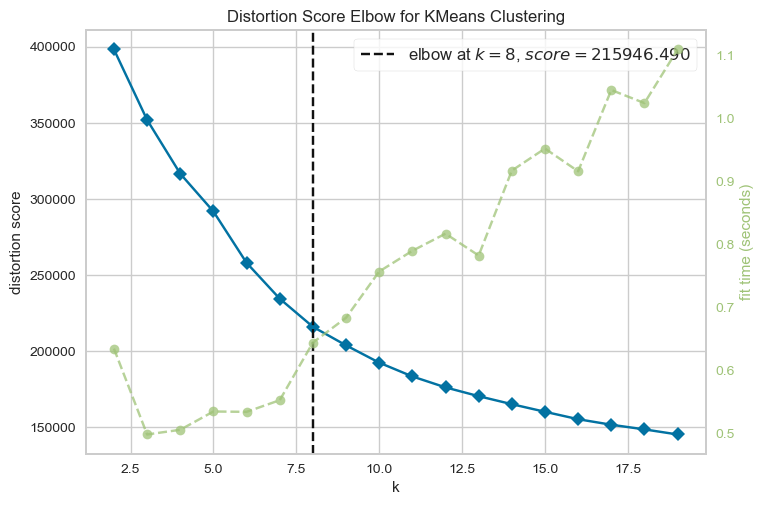

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [11]:
print('Elbow Method')
Elbow_M = KElbowVisualizer(KMeans(init = 'k-means++', random_state = 42), k=(2,20))
Elbow_M.fit(features)
Elbow_M.show()

In [12]:
# Creando el k-Means para los 8 grupos encontrados
kmeans = KMeans(n_clusters = 8, init = 'k-means++', random_state = 42) 
y_kmeans = kmeans.fit_predict(features)

In [13]:
labels = kmeans.labels_

In [14]:
def combine_cluster_labels(user_ids, labels):
    # Convert labels to a DataFrame
    labels_df = pd.DataFrame(labels)    
    # Merge user_ids DataFrame with labels DataFrame based on index
    cluster_df = pd.merge(user_ids, labels_df, left_index=True, right_index=True)
    # Rename columns to 'user' and 'cluster'
    cluster_df.columns = ['user', 'cluster']
    return cluster_df

In [15]:
combine_cluster_labels(user_ids, labels)

,user,cluster
0,2,5
1,4,5
2,5,5
3,7,1
4,8,1
...,...,...
33896,2102054,2
33897,2102356,1
33898,2102680,2
33899,2102983,1


Now, each user finds its own cluster or we can say we have created many clusters of learning communities. Learners within each community share very similar learning interests.

####  Apply PCA on user profile feature vectors to reduce dimensions

If we plot a covariance matrix of the user profile feature vectors with 14 features, we can observe that some features are actually correlated:

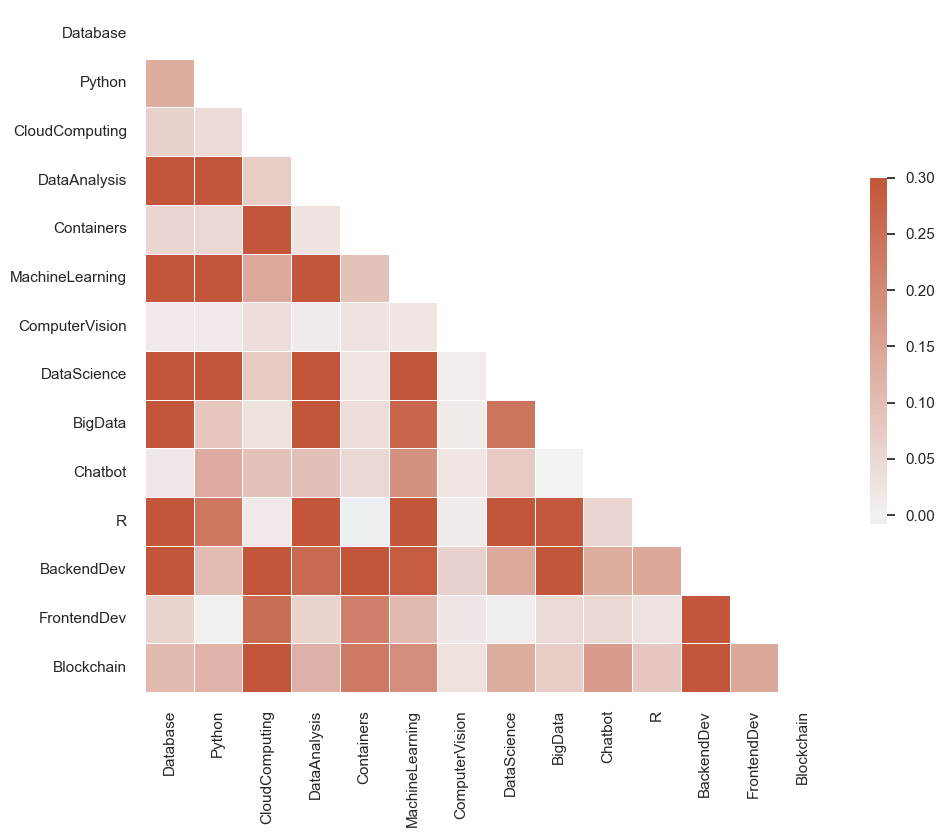

In [16]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = features.cov()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


plt.show()

For example, the feature `MachineLearning` and the feature `DataScience` are correlated. Such covariances among features may indicate that we can apply PCA to find its main components. 

If we only keep the independent main components, then we can reduce the dimensions of our user profile feature vectors.

In [17]:
pca = PCA()
PCA_ds = pd.DataFrame(pca.fit_transform(features), index=features.index, columns=[f'Component {i}' for i in range(pca.n_components_)])
PCA_ds.head()

,Component 0,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8,Component 9,Component 10,Component 11,Component 12,Component 13
0,17.772494,0.200681,1.730609,2.567359,-3.825814,2.707154,0.681042,2.312613,0.868272,-1.066804,0.214616,1.418811,0.513239,0.438589
1,7.145199,-2.847481,2.358636,-0.576654,0.398803,-0.134533,0.549769,0.469033,0.033405,0.437768,1.492973,1.989693,0.258151,1.297102
2,11.363270,1.873619,-1.522077,1.076144,-1.711688,0.883212,1.677582,2.937669,2.097639,0.223187,2.635825,-0.270142,1.574101,0.362926
3,-1.834033,-0.277462,0.564905,0.053470,-0.064440,0.165757,0.030956,0.039519,0.210887,-0.315553,0.087087,0.305141,0.083441,0.013351
4,-1.049125,-0.684767,1.072765,0.006371,-0.005695,0.118686,0.118559,0.559292,0.186379,-0.680568,0.069248,0.187186,-0.036906,-0.013686


In [18]:
from itertools import accumulate

def plot_explained_variance(pca):
    acc = [*accumulate(pca.explained_variance_ratio_)]
    fig, ax = plt.subplots(1, figsize=(50, 20))
    ax.stackplot(range(pca.n_components_), acc)
    ax.scatter(range(pca.n_components_), acc, color='black')
    ax.set_ylim(0, 1)
    ax.set_xlim(0, pca.n_components_-1)
    ax.tick_params(axis='both', labelsize=36)
    ax.set_xlabel('N Components', fontsize=48)
    ax.set_ylabel('Accumulated explained variance', fontsize=48)
    plt.tight_layout()
    plt.show()

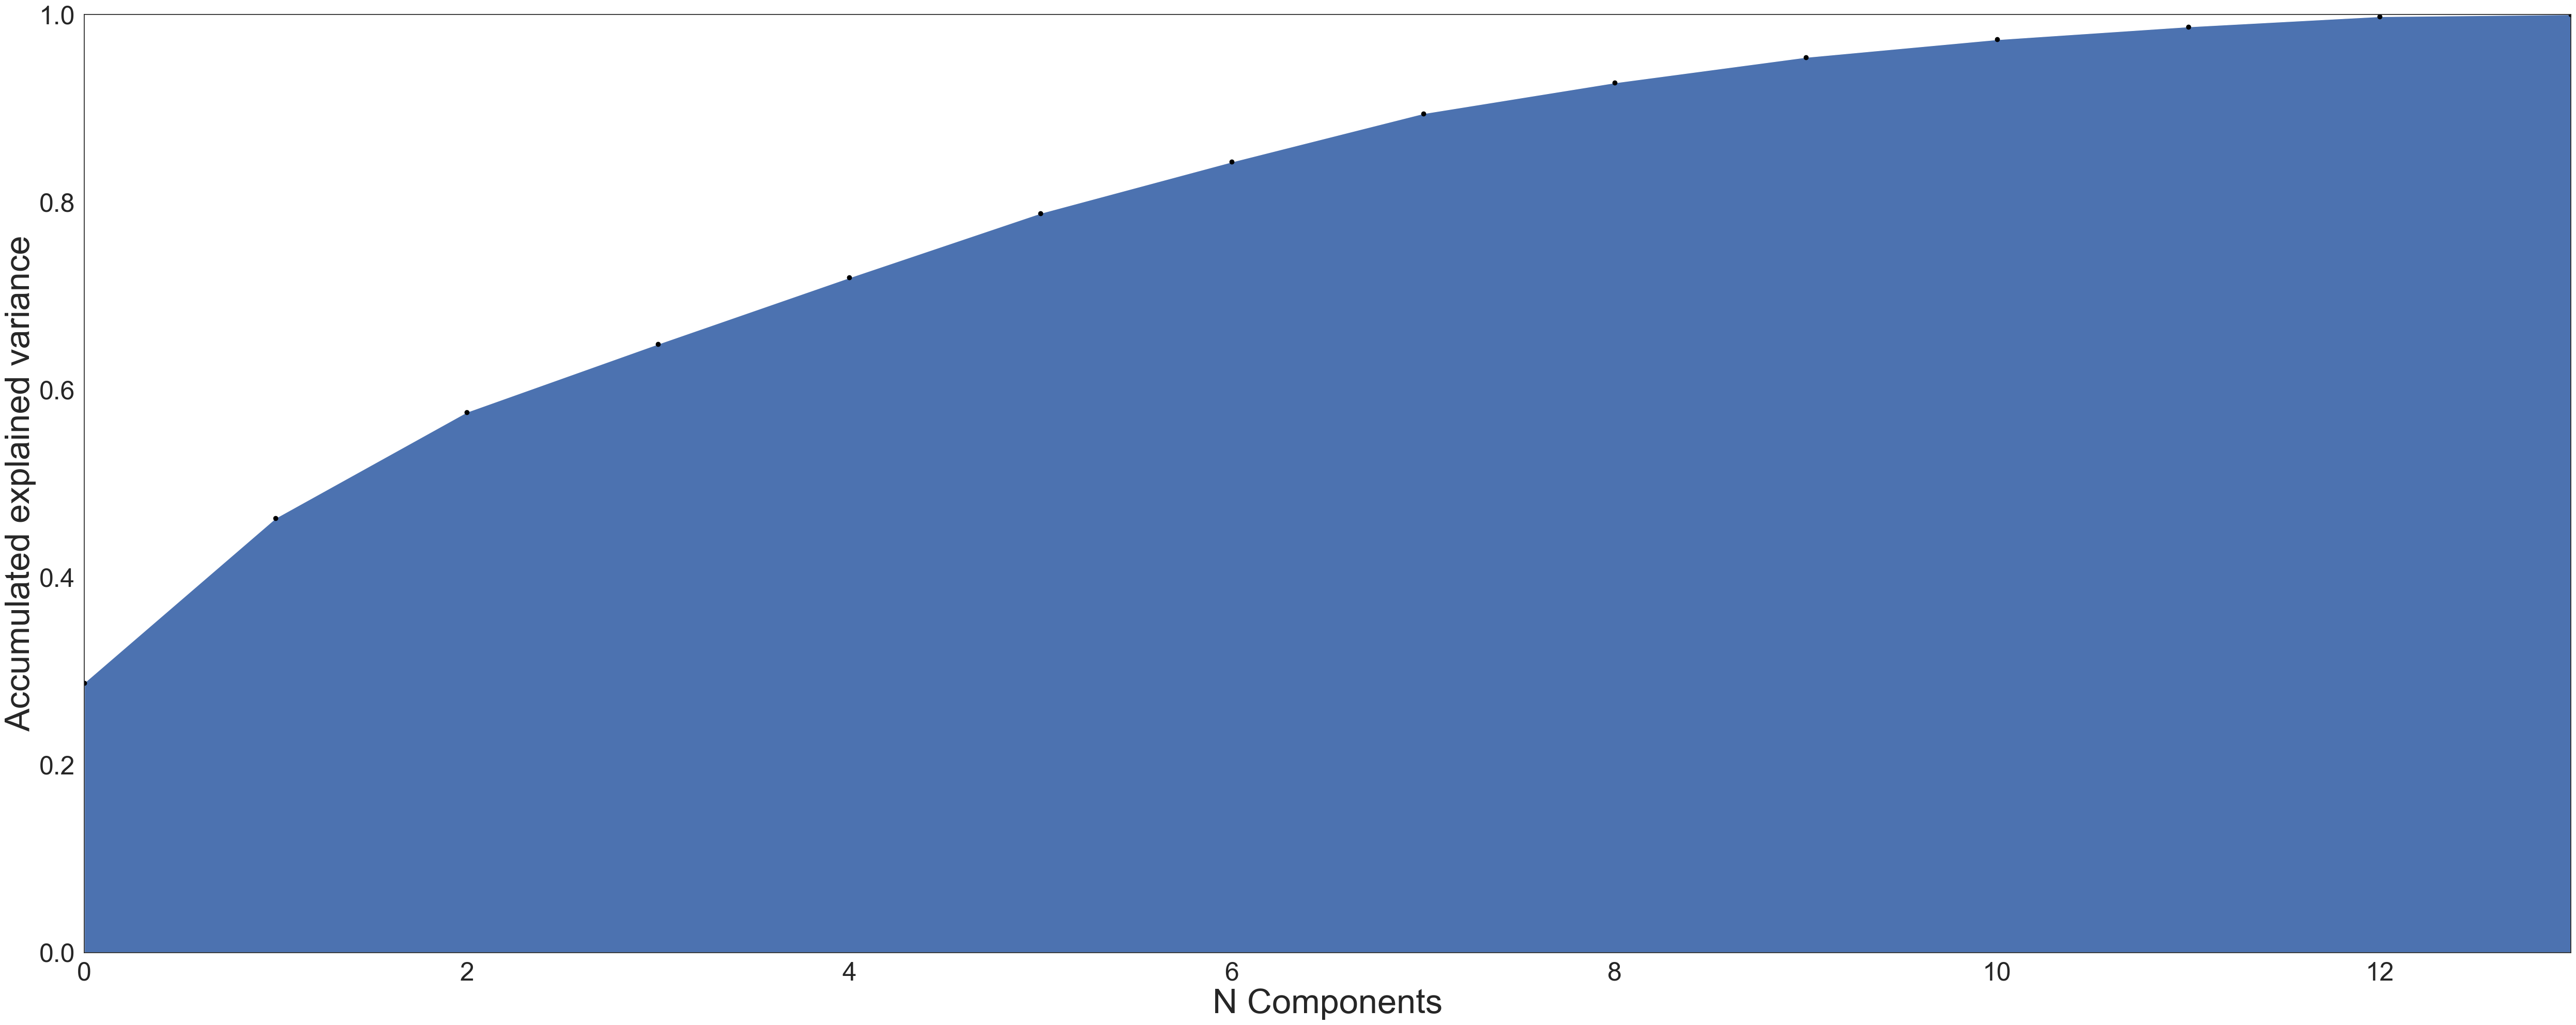

In [19]:
plot_explained_variance(pca)

In [20]:
# Nos quedamos con el 90% de varianza explicada 
threshold = 0.90
num = next(i for i, x in enumerate(accumulate(pca.explained_variance_ratio_), 1) if x >= threshold)
print(f'Podemos retener los {num} componentes y descartar {pca.n_components_-num},')
print(f'Manteniendo  >={100 * threshold}%  de la varianza explicada!')

Podemos retener los 9 componentes y descartar 5,
Manteniendo  >=90.0%  de la varianza explicada!


In [21]:
PCA_ds.drop([f'Component {i}' for i in range(num, pca.n_components_)], axis=1, inplace=True)
PCA_ds.head()

,Component 0,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8
0,17.772494,0.200681,1.730609,2.567359,-3.825814,2.707154,0.681042,2.312613,0.868272
1,7.145199,-2.847481,2.358636,-0.576654,0.398803,-0.134533,0.549769,0.469033,0.033405
2,11.363270,1.873619,-1.522077,1.076144,-1.711688,0.883212,1.677582,2.937669,2.097639
3,-1.834033,-0.277462,0.564905,0.053470,-0.064440,0.165757,0.030956,0.039519,0.210887
4,-1.049125,-0.684767,1.072765,0.006371,-0.005695,0.118686,0.118559,0.559292,0.186379


In [22]:
# Merge the user ids and transformed features into a new dataframe
result_df = pd.concat([user_ids, PCA_ds], axis=1)
result_df

,user,Component 0,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8
0,2,17.772494,0.200681,1.730609,2.567359,-3.825814,2.707154,0.681042,2.312613,0.868272
1,4,7.145199,-2.847481,2.358636,-0.576654,0.398803,-0.134533,0.549769,0.469033,0.033405
2,5,11.363270,1.873619,-1.522077,1.076144,-1.711688,0.883212,1.677582,2.937669,2.097639
3,7,-1.834033,-0.277462,0.564905,0.053470,-0.064440,0.165757,0.030956,0.039519,0.210887
4,8,-1.049125,-0.684767,1.072765,0.006371,-0.005695,0.118686,0.118559,0.559292,0.186379
...,...,...,...,...,...,...,...,...,...,...
33896,2102054,0.633824,0.108815,-0.388871,-0.122665,-0.098364,0.358333,1.752049,1.486542,-0.523600
33897,2102356,-2.095339,0.135058,0.244727,-0.088185,0.025081,0.183641,0.046413,0.191709,0.260437
33898,2102680,0.625943,-0.547167,-1.692824,-0.630589,0.166632,0.676244,-0.055100,0.582091,1.703193
33899,2102983,-2.036832,-0.153534,0.162852,0.082651,-0.126419,0.255109,0.072496,0.113750,0.622900


#### Perform k-means clustering on the PCA transformed feature vectors

Elbow Method


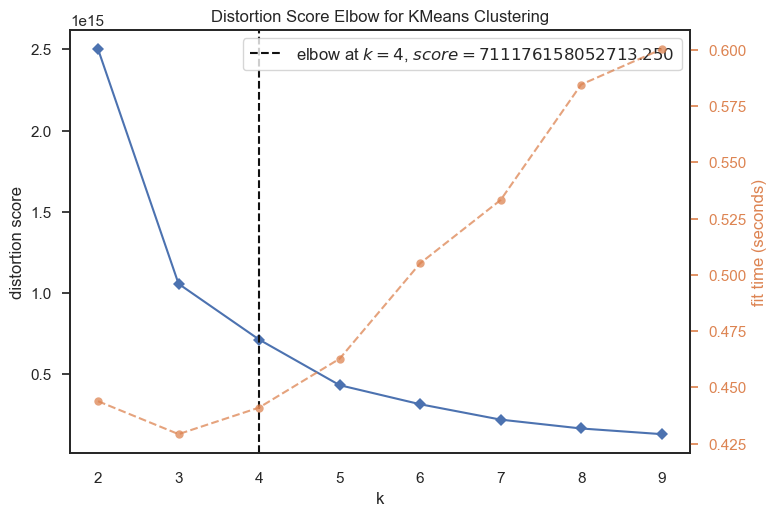

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
print('Elbow Method')
Elbow_M = KElbowVisualizer(KMeans(init = 'k-means++', random_state = 42), k=(2,10))
Elbow_M.fit(result_df)
Elbow_M.show()

In [24]:
# Creando el k-Means para los 4 grupos encontrados
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42) 
y_kmeans_pca = kmeans_pca.fit_predict(result_df)

In [25]:
user_ids["Clusters"] = y_kmeans_pca



In [26]:
user_ids.tail(5)

,user,Clusters
33896,2102054,1
33897,2102356,1
33898,2102680,1
33899,2102983,1
33900,2103039,1


In [27]:
user_ids["Clusters"].unique()

array([2, 0, 3, 1])

#### Generate course recommendations based on the popular courses in the same cluster

In summary, the clustering-based recommender system first groups all users based on their profiles, and maintains a popular courses list for each group. 

For any group member who needs course recommendations, the algorithm recommends the unselected courses from the popular course lists.

Next, suppose we have a set of test users, and we want to recommend new courses to them using a clustering-based recommender system:

In [28]:
test_user_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-ML0321EN-Coursera/labs/v2/module_3/ratings.csv"

# Reading the test user data CSV file into a pandas DataFrame
# Selecting only the 'user' and 'item' columns using indexing
test_users_df = pd.read_csv(test_user_url)[['user', 'item']]

# Displaying the first few rows of the DataFrame to inspect its contents
test_users_df.head()

,user,item
0,1889878,CC0101EN
1,1342067,CL0101EN
2,1990814,ML0120ENv3
3,380098,BD0211EN
4,779563,DS0101EN


In [29]:
test_users_labelled = pd.merge(test_users_df, user_ids, left_on='user', right_on='user')

In [30]:
test_users_labelled.tail(15)

,user,item,Clusters
233291,1002992,BC0201EN,0
233292,2090267,DS0132EN,1
233293,24632,DS0101EN,2
233294,226549,CB0103EN,2
233295,678952,BC0201EN,0
233296,381280,CB0103EN,2
233297,280711,ML0151EN,2
233298,1673892,CNSC02EN,1
233299,1297318,DAI101EN,3
233300,1055271,BC0201EN,0


In [31]:
test_users_labelled['user'].nunique()

33901

In [32]:
# Extracting the 'item' and 'cluster' columns from the test_users_labelled DataFrame
courses_cluster = test_users_labelled[['item', 'Clusters']]

# Adding a new column 'count' with a value of 1 for each row in the courses_cluster DataFrame
courses_cluster['count'] = [1] * len(courses_cluster)

# Grouping the DataFrame by 'cluster' and 'item', aggregating the 'count' column with the sum function,
# and resetting the index to make the result more readable
courses_cluster_grouped = courses_cluster.groupby(['Clusters','item']).agg(enrollments=('count','sum')).reset_index()

In [33]:
courses_cluster_grouped.sort_values(by = 'enrollments',ascending=False)

,Clusters,item,enrollments
406,3,PY0101EN,4865
4,0,BD0101EN,4573
47,0,DS0101EN,4472
86,0,PY0101EN,4435
369,3,DS0101EN,3894
...,...,...,...
311,2,ST0301EN,1
255,2,DS0107,1
264,2,DX0106EN,1
266,2,DX0108EN,1


In [34]:
# I choose the 20 courses with the most enrolled
top_courses_per_cluster = courses_cluster_grouped.sort_values(by=['Clusters', 'enrollments'], ascending=[True, False]) \
                              .groupby('Clusters') \
                              .head(20)

In [35]:
course_genre_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/course_genre.csv"


In [36]:
course_df = pd.read_csv(course_genre_url)

In [37]:
top_courses_per_cluster = top_courses_per_cluster.merge(course_df[['COURSE_ID', 'TITLE']], how='inner', left_on='item', right_on='COURSE_ID')

In [38]:
top_courses_per_cluster

,Clusters,item,enrollments,COURSE_ID,TITLE
0,0,BD0101EN,4573,BD0101EN,big data 101
1,1,BD0101EN,1817,BD0101EN,big data 101
2,2,BD0101EN,3398,BD0101EN,big data 101
3,3,BD0101EN,3503,BD0101EN,big data 101
4,0,DS0101EN,4472,DS0101EN,introduction to data science
...,...,...,...,...,...
75,2,BD0131EN,925,BD0131EN,moving data into hadoop
76,2,BD0212EN,733,BD0212EN,spark fundamentals ii
77,2,PA0101EN,717,PA0101EN,predictive modeling fundamentals i
78,3,CL0101EN,1701,CL0101EN,ibm cloud essentials


In [39]:
def recommend_courses_for_user(user_subset):
    user_id = user_subset['user'].iloc[0]
    
    #Get the courses the user is enrolled in
    enrolled_courses = set(user_subset['item'])
    
    #Find the user's cluster label
    cluster_id = user_subset['Clusters'].iloc[0]
    
    #Find all courses in the same cluster
    cluster_courses = set(top_courses_per_cluster[top_courses_per_cluster['Clusters'] == cluster_id]['item'])
    
    #Find new/unseen courses by the user
    new_courses = cluster_courses.difference(enrolled_courses)
    
    #Get the names of recommended courses
    recommended_courses = top_courses_per_cluster[top_courses_per_cluster['item'].isin(new_courses)]
    
    # Create a DataFrame with the recommendations for this user
    recommendations_df = recommended_courses[['item', 'TITLE']].copy()
    recommendations_df['user'] = user_id
    
    return recommendations_df

# Apply the function to each user group and concatenate the results
recommendations_df = test_users_labelled.groupby('user').apply(recommend_courses_for_user).reset_index(drop=True)


recommendations_df

,item,TITLE,user
0,DS0101EN,introduction to data science,2
1,DS0101EN,introduction to data science,2
2,DS0101EN,introduction to data science,2
3,DS0101EN,introduction to data science,2
4,DS0105EN,data science hands on with open source tools,2
...,...,...,...
1643834,CC0101EN,introduction to cloud,2103039
1643835,DB0101EN,sql and relational databases 101,2103039
1643836,DB0101EN,sql and relational databases 101,2103039
1643837,CNSC02EN,cloud native security conference data security,2103039


In [40]:
recommendations_df.drop_duplicates(inplace=True)

- On average, how many new/unseen courses have been recommended to each user?
- What are the most frequently recommended courses? Return the top-10 commonly recommended courses across all users.

In [41]:

user_recommendations_count = recommendations_df.groupby('user')['item'].count()


average_recommended_courses_per_user = user_recommendations_count.mean()


print(f"On average, {round(average_recommended_courses_per_user,0):.2f} new/unseen courses have been recommended to each user.")

On average, 15.00 new/unseen courses have been recommended to each user.


In [42]:

course_recommendation_counts = recommendations_df['item'].value_counts()


top_10_recommended_courses = course_recommendation_counts.head(10).reset_index()
top_10_recommended_courses.columns = ['item', 'recommendation_count']


top_10_recommended_courses = top_10_recommended_courses.merge(
    top_courses_per_cluster[['item', 'TITLE']], 
    on='item', 
    how='left'
).drop_duplicates()

print("Top-10 commonly recommended courses:")
top_10_recommended_courses

Top-10 commonly recommended courses:


,item,recommendation_count,TITLE
0,ST0101EN,28886,statistics 101
4,RP0101EN,28664,r for data science
8,CB0103EN,28389,build your own chatbot
12,ML0115EN,27578,deep learning 101
16,DS0105EN,26702,data science hands on with open source tools
20,BD0211EN,26350,spark fundamentals i
24,DS0103EN,26182,data science methodology
28,DA0101EN,25598,data analysis with python
32,BD0111EN,23302,hadoop 101
36,CO0101EN,21864,docker essentials a developer introduction


## Collaborative Filtering based Recommender System using K Nearest Neighbor and  Non-negative Matrix Factorization

In [43]:
ratings_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-ML0321EN-Coursera/labs/v2/module_3/ratings.csv"

In [44]:
ratings_df = pd.read_csv(ratings_url)
ratings_df.head()

,user,item,rating
0,1889878,CC0101EN,5
1,1342067,CL0101EN,3
2,1990814,ML0120ENv3,5
3,380098,BD0211EN,5
4,779563,DS0101EN,3


In [45]:
from surprise import KNNBasic
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise.model_selection import cross_validate
from surprise import NMF

In [46]:
# Save the rating dataframe to a CSV file
ratings_df.to_csv("course_ratings.csv", index=False)

# Read the course rating dataset with columns user item rating
reader = Reader(
    line_format='user item rating', sep=',', skip_lines=1, rating_scale=(2, 3))

# Load the dataset from the CSV file
course_dataset = Dataset.load_from_file("course_ratings.csv", reader=reader)

In [47]:
# sample random trainset and testset
# test set is made of 25% of the ratings.
trainset, testset = train_test_split(course_dataset, test_size=.3, random_state=42)

In [48]:
print(f"Total {trainset.n_users} users and {trainset.n_items} items in the trainingset")

Total 31380 users and 124 items in the trainingset


In [49]:
# KNN
algorithms = {
    'KNNBasic pearson': KNNBasic(sim_options={'name': 'pearson_baseline', 'user_based': False}),
    'KNNBasic cosine':  KNNBasic(sim_options={'name': 'cosine', 'user_based': False}),
    'NMF': NMF(n_factors=20, n_epochs=10, random_state=123, verbose=True)
    
}


results = {
    'Algorithm': [],
    'RMSE': [],
    'MAE': [],
}

for name, algo in algorithms.items():
    
    cv_results = cross_validate(algo, course_dataset, measures=['RMSE', 'MAE'], cv=5, verbose=False)
    results['Algorithm'].append(name)
    results['RMSE'].append(np.mean(cv_results['test_rmse']))
    results['MAE'].append(np.mean(cv_results['test_mae']))

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Processing epoch 0
Processing epoch

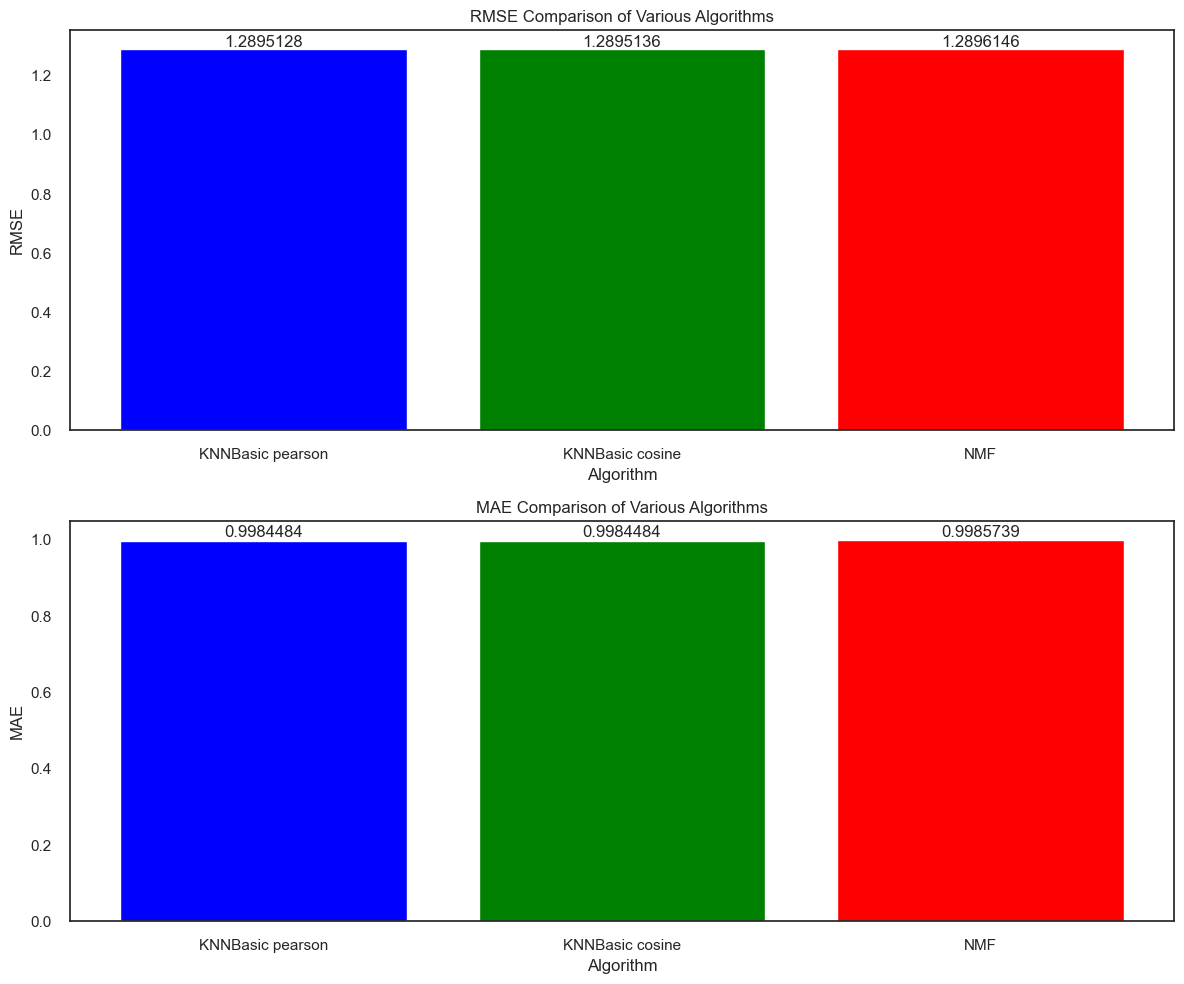

In [50]:

results_df = pd.DataFrame(results)

fig, ax = plt.subplots(2, 1, figsize=(12, 10))

ax[0].bar(results_df['Algorithm'], results_df['RMSE'], color=['blue', 'green', 'red'])
ax[0].set_xlabel('Algorithm')
ax[0].set_ylabel('RMSE')
ax[0].set_title('RMSE Comparison of Various Algorithms')
for index, value in enumerate(results_df['RMSE']):
    ax[0].text(index, value + 0.01, f"{value:.7f}", ha='center')

ax[1].bar(results_df['Algorithm'], results_df['MAE'], color=['blue', 'green', 'red'])
ax[1].set_xlabel('Algorithm')
ax[1].set_ylabel('MAE')
ax[1].set_title('MAE Comparison of Various Algorithms')
for index, value in enumerate(results_df['MAE']):
    ax[1].text(index, value + 0.01, f"{value:.7f}", ha='center')



plt.tight_layout()
plt.show()

In [51]:
results_df

,Algorithm,RMSE,MAE
0,KNNBasic pearson,1.289513,0.998448
1,KNNBasic cosine,1.289514,0.998448
2,NMF,1.289615,0.998574


## Classification-based Rating Mode Prediction using Embedding Features

In [52]:
user_emb_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/user_embeddings.csv"
item_emb_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/course_embeddings.csv"

In [53]:
ratings_df.head()

,user,item,rating
0,1889878,CC0101EN,5
1,1342067,CL0101EN,3
2,1990814,ML0120ENv3,5
3,380098,BD0211EN,5
4,779563,DS0101EN,3


In [54]:
# Load user embeddings
user_emb = pd.read_csv(user_emb_url)
# Load item embeddings
item_emb = pd.read_csv(item_emb_url)

In [55]:
user_emb.head()

,user,UFeature0,UFeature1,UFeature2,UFeature3,UFeature4,UFeature5,UFeature6,UFeature7,UFeature8,UFeature9,UFeature10,UFeature11,UFeature12,UFeature13,UFeature14,UFeature15
0,1889878,0.080721,-0.129561,0.087998,0.030231,0.082691,-0.004176,-0.003480,0.091464,-0.040247,0.018958,-0.153328,-0.090143,0.082830,-0.058721,0.057929,-0.001472
1,1342067,0.068047,-0.112781,0.045208,-0.007570,-0.038382,0.068037,0.114949,0.104128,-0.034401,0.004011,0.064832,0.165857,-0.004384,0.053257,0.014308,0.056684
2,1990814,0.124623,0.012910,-0.072627,0.049935,0.020158,0.133306,-0.035366,-0.156026,0.039269,0.042195,0.014695,-0.115989,0.031158,0.102021,-0.020601,0.116488
3,380098,-0.034870,0.000715,0.077406,0.070311,-0.043007,-0.035446,0.032846,-0.060944,0.112384,0.002114,0.090660,-0.068545,0.008967,0.063962,0.052347,0.018072
4,779563,0.106414,-0.001887,-0.017211,-0.042277,-0.074953,-0.056732,0.074610,-0.019367,-0.031341,0.064896,-0.048158,-0.047309,-0.007544,0.010474,-0.032287,-0.083983


In [56]:
item_emb.head()

,item,CFeature0,CFeature1,CFeature2,CFeature3,CFeature4,CFeature5,CFeature6,CFeature7,CFeature8,CFeature9,CFeature10,CFeature11,CFeature12,CFeature13,CFeature14,CFeature15
0,CC0101EN,0.009657,-0.005238,-0.004098,0.016303,-0.005274,-0.000361,-0.015081,-0.012229,0.015686,0.008401,-0.035495,0.009381,-0.032560,-0.007292,0.000966,-0.006218
1,CL0101EN,-0.008611,0.028041,0.021899,-0.001465,0.006900,-0.017981,0.010899,-0.037610,-0.019397,-0.025682,-0.000620,0.038803,0.000196,-0.045343,0.012863,0.019429
2,ML0120ENv3,0.027439,-0.027649,-0.007484,-0.059451,0.003972,0.020496,-0.012695,0.036138,0.019965,0.018686,-0.010450,-0.050011,0.013845,-0.044454,-0.001480,-0.007559
3,BD0211EN,0.020163,-0.011972,-0.003714,-0.015548,-0.007540,0.014847,-0.005700,-0.006068,-0.005792,-0.023036,0.015999,-0.023480,0.015469,0.022221,-0.023115,-0.001785
4,DS0101EN,0.006399,0.000492,0.005640,0.009639,-0.005487,-0.000590,-0.010015,-0.001514,-0.017598,0.003590,0.016799,0.002732,0.005162,0.015031,-0.000877,-0.021283


In [57]:
# Merge user embedding features
merged_df = pd.merge(ratings_df, user_emb, how='left', left_on='user', right_on='user').fillna(0)
# Merge course embedding features
merged_df = pd.merge(merged_df, item_emb, how='left', left_on='item', right_on='item').fillna(0)

In [58]:
merged_df.head()

,user,item,rating,UFeature0,UFeature1,UFeature2,UFeature3,UFeature4,UFeature5,UFeature6,...,CFeature6,CFeature7,CFeature8,CFeature9,CFeature10,CFeature11,CFeature12,CFeature13,CFeature14,CFeature15
0,1889878,CC0101EN,5,0.080721,-0.129561,0.087998,0.030231,0.082691,-0.004176,-0.003480,...,-0.015081,-0.012229,0.015686,0.008401,-0.035495,0.009381,-0.032560,-0.007292,0.000966,-0.006218
1,1342067,CL0101EN,3,0.068047,-0.112781,0.045208,-0.007570,-0.038382,0.068037,0.114949,...,0.010899,-0.037610,-0.019397,-0.025682,-0.000620,0.038803,0.000196,-0.045343,0.012863,0.019429
2,1990814,ML0120ENv3,5,0.124623,0.012910,-0.072627,0.049935,0.020158,0.133306,-0.035366,...,-0.012695,0.036138,0.019965,0.018686,-0.010450,-0.050011,0.013845,-0.044454,-0.001480,-0.007559
3,380098,BD0211EN,5,-0.034870,0.000715,0.077406,0.070311,-0.043007,-0.035446,0.032846,...,-0.005700,-0.006068,-0.005792,-0.023036,0.015999,-0.023480,0.015469,0.022221,-0.023115,-0.001785
4,779563,DS0101EN,3,0.106414,-0.001887,-0.017211,-0.042277,-0.074953,-0.056732,0.074610,...,-0.010015,-0.001514,-0.017598,0.003590,0.016799,0.002732,0.005162,0.015031,-0.000877,-0.021283


In [59]:
merged_df['rating'].value_counts() # we only have 3 ratings

4    77936
3    77866
5    77504
Name: rating, dtype: int64

In [60]:
u_feautres = [f"UFeature{i}" for i in range(16)] # Assuming there are 16 user embedding features
c_features = [f"CFeature{i}" for i in range(16)] # Assuming there are 16 course embedding features
# Extract user embedding features
user_embeddings = merged_df[u_feautres]
# Extract course embedding features
course_embeddings = merged_df[c_features]
# Extract ratings
ratings = merged_df['rating']

# Aggregate the two feature columns using element-wise add
interaction_dataset = user_embeddings + course_embeddings.values
# Rename the columns of the resulting DataFrame
interaction_dataset.columns = [f"Feature{i}" for i in range(16)]
# Add the 'rating' column from the original DataFrame 
interaction_dataset['rating'] = ratings
# Display the first few rows of the regression dataset
interaction_dataset.head()

,Feature0,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Feature13,Feature14,Feature15,rating
0,0.090378,-0.134799,0.083900,0.046534,0.077417,-0.004537,-0.018561,0.079236,-0.024561,0.027359,-0.188823,-0.080762,0.050271,-0.066013,0.058894,-0.007689,5
1,0.059437,-0.084740,0.067107,-0.009036,-0.031482,0.050057,0.125847,0.066517,-0.053798,-0.021671,0.064212,0.204660,-0.004188,0.007914,0.027170,0.076114,3
2,0.152061,-0.014739,-0.080112,-0.009516,0.024130,0.153802,-0.048061,-0.119888,0.059234,0.060882,0.004244,-0.166000,0.045002,0.057566,-0.022081,0.108929,5
3,-0.014707,-0.011257,0.073692,0.054763,-0.050547,-0.020599,0.027146,-0.067012,0.106593,-0.020921,0.106658,-0.092025,0.024436,0.086183,0.029232,0.016287,5
4,0.112812,-0.001395,-0.011572,-0.032638,-0.080440,-0.057321,0.064595,-0.020880,-0.048939,0.068486,-0.031359,-0.044577,-0.002381,0.025505,-0.033164,-0.105266,3


In [61]:
from sklearn.preprocessing import LabelEncoder

In [62]:
# Extract features (X) from the interaction_dataset DataFrame
# Selects all rows and all columns except the last column (features)
X = interaction_dataset.iloc[:, :-1]
# Extract the target variable (y_raw) from the interaction_dataset DataFrame
# Selects all rows and only the last column (target variable)
y_raw = interaction_dataset.iloc[:, -1]
# Initialize a LabelEncoder object to encode the target variable
label_encoder = LabelEncoder()
# Encode the target variable (y_raw) using the LabelEncoder
# .values.ravel() converts the target variable to a flattened array before encoding
# The LabelEncoder fits and transforms the target variable, assigning encoded labels to y
y = label_encoder.fit_transform(y_raw.values.ravel())



In [63]:
np.unique(y)

array([0, 1, 2], dtype=int64)

In [64]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import lightgbm as lgb
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score


In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##### Logistic Regression

In [66]:
log_reg = LogisticRegression(max_iter=1000, multi_class='multinomial')

In [67]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'saga']
}


grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


best_model = grid_search.best_estimator_



In [68]:
best_model 

LogisticRegression(C=10, max_iter=1000, multi_class='multinomial',
                   solver='newton-cg')

In [69]:
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


print(f'Best Parameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)



Best Parameters: {'C': 10, 'solver': 'newton-cg'}
Accuracy: 0.33458109498228367
Confusion Matrix:
[[ 7066 11702  4761]
 [ 6950 11547  4737]
 [ 7092 11332  4805]]
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.30      0.32     23529
           1       0.33      0.50      0.40     23234
           2       0.34      0.21      0.26     23229

    accuracy                           0.33     69992
   macro avg       0.33      0.33      0.32     69992
weighted avg       0.33      0.33      0.32     69992



In [70]:
cross_val_scores = cross_val_score(best_model, X, y, cv=10, scoring='accuracy')
print(f'Cross-Validation Accuracy: {cross_val_scores.mean()} ± {cross_val_scores.std()}')

Cross-Validation Accuracy: 0.3326703581508723 ± 0.003138848583058128


The model has a low overall accuracy (33.46%), indicating that it is not performing well in classifying the instances into the three classes.
Class 1 has the best recall (50%), but its precision is still low.
The metrics for classes 0 and 2 are even lower, especially in recall for class 2 (21%).

##### XGBoost

Let's try a more complex model:

In [71]:
xgb_model = xgb.XGBClassifier(objective='multi:softmax')



In [72]:
xgb_model.fit(X_train, y_train)





XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [73]:
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)


print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


cross_val_scores = cross_val_score(xgb_model, X, y, cv=10, scoring='accuracy')
print(f'Cross-Validation Accuracy: {cross_val_scores.mean()} ± {cross_val_scores.std()}')

Accuracy: 0.33298091210424047
Confusion Matrix:
[[7455 8409 7665]
 [7366 8408 7460]
 [7482 8304 7443]]
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.32      0.33     23529
           1       0.33      0.36      0.35     23234
           2       0.33      0.32      0.33     23229

    accuracy                           0.33     69992
   macro avg       0.33      0.33      0.33     69992
weighted avg       0.33      0.33      0.33     69992

Cross-Validation Accuracy: 0.33340760283853993 ± 0.002567211774138049
